### The Model obtained by triaining through this code is used on the Raspberry Pi Device

# Human Activity Recognition

## Obtain the input files

In [1]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=100, random_state=191)

valid_files = train_files[300:]
valid_targets = train_targets[300:]

train_files = train_files[:300]
train_targets = train_targets[:300]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 522)
('\nNumber of videos in training data:', 300)
('Number of videos in validation data:', 122)
('Number of videos in test data:', 100)


### Description of the class labels

In [2]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


### Each video file is associated with its class label

In [3]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data/handwaving/person05_handwaving_d4_uncomp.avi', 2)
('/home/geet/project/implementation/CNN/Data/walking/person13_walking_d3_uncomp.avi', 5)
('/home/geet/project/implementation/CNN/Data/boxing/person09_boxing_d4_uncomp.avi', 0)
('/home/geet/project/implementation/CNN/Data/running/person11_running_d4_uncomp.avi', 4)
('/home/geet/project/implementation/CNN/Data/walking/person14_walking_d1_uncomp.avi', 5)


('\nShape of the sample data:', (432, 120, 160, 3))


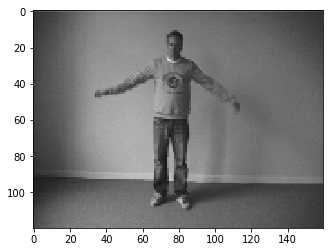

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[300])

In [5]:
sec=7
frames_needed=35

In [6]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):
        """
        Parameters:
            path (str): Required
                Path of the video to be read

        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (1, <No. of frames>, <height>, <width>, <channels>)
        """

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

/home/geet/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video(path):
        """
        Parameters:
            path (str): Required
                Path of the video to be read

        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (1, <No. of frames>, <height>, <width>, <channels>)
        """

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [8]:
def read_videos(paths):
        """
        Parameters:
            paths (list): Required
                 A list of paths of the videos to be read

        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (<No. of Videos>, <No. of frames>, <height>, <width>, <channels>)
        """
        list_of_videos = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [9]:
def read_videos_bgsub(paths, size):
        """
        Parameters:
            paths (list): Required
                 A list of paths of the videos to be read

        Returns:
            Numpy.ndarray
                A 5-d tensor with shape (<No. of Videos>, <No. of frames>, <height>, <width>, <channels>)
        """
        list_of_videos = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [13]:
X_train_bgsub = read_videos_bgsub(train_files,20)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)

100%|██████████| 300/300 [03:34<00:00,  1.40it/s]

('Shape of training data:', (300, 35, 20, 20, 1))
('Shape of training labels:', (300, 6))


In [14]:
X_test_bgsub = read_videos_bgsub(test_files,20)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)

100%|██████████| 100/100 [01:07<00:00,  1.48it/s]

('Shape of testing data:', (100, 35, 20, 20, 1))
('Shape of testing labels:', (100, 6))


In [15]:
X_valid_bgsub = read_videos_bgsub(valid_files,20)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)

100%|██████████| 122/122 [01:21<00:00,  1.51it/s]

('Shape of validation data:', (122, 35, 20, 20, 1))
('Shape of validation labels:', (122, 6))


In [17]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


## Model3 BG Subtraction

In [18]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train_bgsub.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())

# Hidden layer
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(6, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 35, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 17, 8, 8, 64)      18496     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 9, 4, 4, 64)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 2, 2, 256)      295168    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_1 ( (None, 256)               0         
__________

In [19]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='Model_3_bg_rp.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 300 samples, validate on 122 samples
Epoch 1/60
300/300 [==============================] - 71s 236ms/step - loss: 1.7584 - acc: 0.2100 - val_loss: 1.6246 - val_acc: 0.2705

Epoch 00001: val_loss improved from inf to 1.62463, saving model to Model_3_bg_rp.weights.best.hdf5
Epoch 2/60
300/300 [==============================] - 72s 238ms/step - loss: 1.6124 - acc: 0.2533 - val_loss: 1.4593 - val_acc: 0.2295

Epoch 00002: val_loss improved from 1.62463 to 1.45930, saving model to Model_3_bg_rp.weights.best.hdf5
Epoch 3/60
300/300 [==============================] - 70s 234ms/step - loss: 1.4978 - acc: 0.2800 - val_loss: 1.3195 - val_acc: 0.3033

Epoch 00003: val_loss improved from 1.45930 to 1.31945, saving model to Model_3_bg_rp.weights.best.hdf5
Epoch 4/60
300/300 [==============================] - 70s 233ms/step - loss: 1.3756 - acc: 0.3733 - val_loss: 1.1403 - val_acc: 0.6311

Epoch 00004: val_loss improved from 1.31945 to 1.14029, saving model to Model_3_bg_rp.weights.best.hdf

In [20]:
# Loading the model that performed the best on the validation set
model3_bg.load_weights('Model_3_bg_rp.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 84.00%


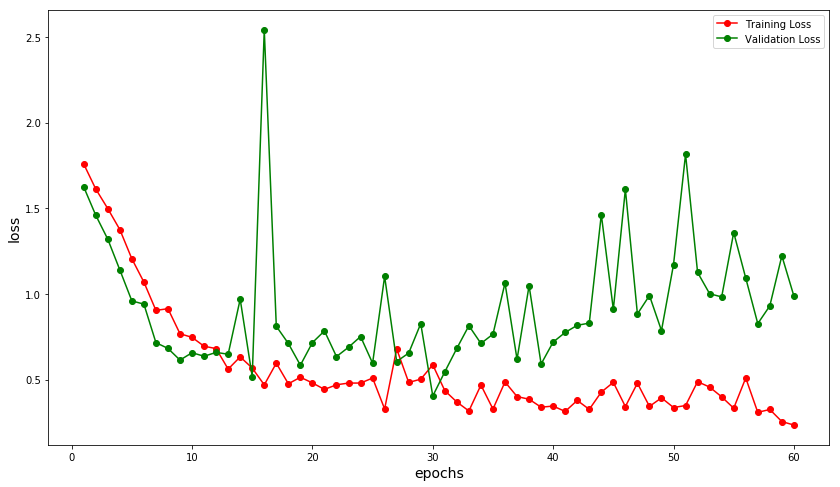

In [21]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()